<a href="https://colab.research.google.com/github/KhafidhotulUrfa/MSIB_Project/blob/main/Siena_FinalProject_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Understanding

Mengklasifikasikan saham kesehatan untuk meminimalisir kemungkinan lost dalam melakukan investasi.

Permasalahan: Unsupervised Learning

Kemungkinan Algoritma: K - Means Clustering

Evaluasi: Elbow Method, Silhouette Score

In [ ]:
# import google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Understanding

In [ ]:
# Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Load data

url = '/content/drive/MyDrive/Colab Notebooks/MSIB/Dataset Tugas Akhir/Data Training/dataset_saham_kesehatan_utama_monthly.xlsx'

load_data = pd.read_excel(url)

df = pd.DataFrame(load_data)

df.head()

,Kode Saham,Date,Open,High,Low,Close,Adj Close,Volume,Return,MA
0,BMHS,8/1/2021,1100.0,1130.0,950.0,1115.0,1110.248047,752667200,0.000000,1115.000000
1,BMHS,9/1/2021,1080.0,1155.0,1030.0,1095.0,1090.333252,1141932900,-0.017937,1105.000000
2,BMHS,10/1/2021,1085.0,1095.0,875.0,905.0,901.143005,892012600,-0.173516,1038.333333
3,BMHS,11/1/2021,905.0,935.0,830.0,855.0,851.356140,1239137600,-0.055249,951.666667
4,BMHS,12/1/2021,855.0,900.0,785.0,830.0,826.462646,787451600,-0.029240,863.333333


## Data Preparation
1. Tidak ada melakukan handling missing value. disebabkan tidak ada data yang NULL balue dan juga NaN value.
2. Handling missing value sudah dilakukan saat proses penggabungan data.

In [ ]:
df.isnull().sum()

Kode Saham    0
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Return        0
MA            0
dtype: int64

## Pemodelan Data

In [ ]:
from sklearn.cluster import KMeans
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler

## Menggunakan Field Close dan Return

In [ ]:
# Menentukan input variabel
x_return = df[['Close','Return']]

# Pada pemodelan Unsupervised Learning tidak ada variabel target

## Elbow Method

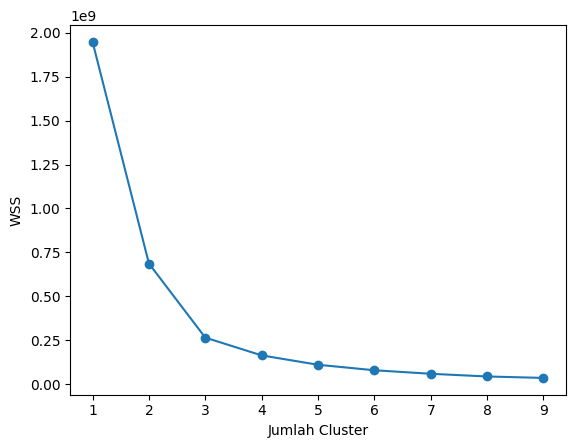

In [ ]:
cluster_range = range(1,10)
cluster_wss = []

for num_cluster in cluster_range:
  clusters = KMeans(num_cluster)
  clusters.fit(x_return)
  cluster_wss.append(clusters.inertia_)

plt.xlabel('Jumlah Cluster')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker='o')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
#Menetukan kongfigurasi KMeans pada model cluster 3
cls=KMeans(n_clusters=3,random_state=0)
#Membentuk Model
model_cls=cls.fit(x_return)

score = silhouette_score(x_return, cls.labels_).round(3)

print (f'Score Silhouette : {score}')

Score Silhouette : 0.635


In [ ]:
#Menetukan kongfigurasi KMeans pada model cluster 4
cls=KMeans(n_clusters=4,random_state=0)
#Membentuk Model
model_cls=cls.fit(x_return)

score = silhouette_score(x_return,cls.labels_).round(4)

print (f'Score Silhouette : {score}')

Score Silhouette : 0.6045


## Menggunakan Field Moving Average

In [ ]:
# Menentukan input variabel
x_ma = df[['Open',	'Close',  'Return', 'MA']]

# Pada pemodelan Unsupervised Learning tidak ada variabel target

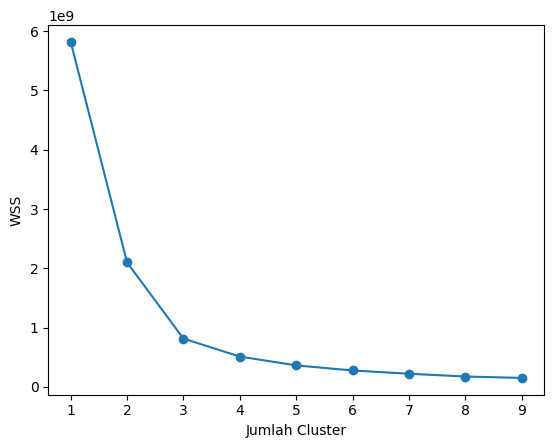

In [ ]:
cluster_ma_range = range(1,10)
cluster_ma_wss = []

for num_cluster in cluster_ma_range:
  clusters_ma = KMeans(num_cluster)
  clusters_ma.fit(x_ma)
  cluster_ma_wss.append(clusters_ma.inertia_)

plt.xlabel('Jumlah Cluster')
plt.ylabel('WSS')
plt.plot(cluster_ma_range, cluster_ma_wss, marker='o')
plt.show()

In [ ]:
#Menetukan kongfigurasi KMeans pada model cluster 3
cls_ma=KMeans(n_clusters=3,random_state=0)
#Membentuk Model
model_cls_ma=cls_ma.fit(x_ma)

score_ma = silhouette_score(x_ma, cls_ma.labels_).round(3)

print (f'Score Silhouette : {score_ma}')

Score Silhouette : 0.627


In [ ]:
#Menetukan kongfigurasi KMeans pada model cluster 4
cls_ma=KMeans(n_clusters=4,random_state=0)
#Membentuk Model
model_cls_ma=cls_ma.fit(x_ma)

score_ma = silhouette_score(x_ma, cls_ma.labels_).round(4)

print (f'Score Silhouette : {score_ma}')

Score Silhouette : 0.5905


## Menggunakan Field Hihgh, Close, Return

In [ ]:
# Menentukan input variabel
x_all = df[['High',	'Close', 'Return']]

# Pada pemodelan Unsupervised Learning tidak ada variabel target

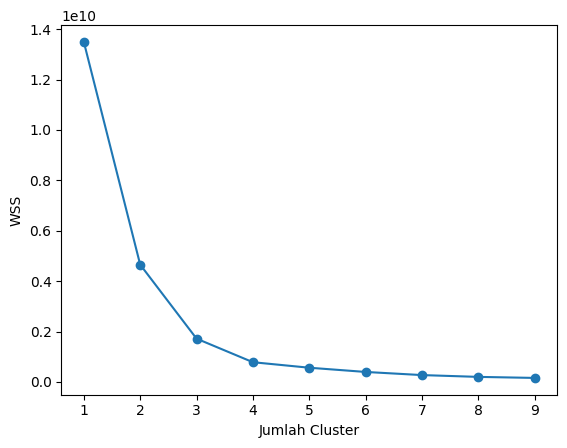

In [ ]:
cluster_all_range = range(1,10)
cluster_all_wss = []

for num_cluster in cluster_all_range:
  clusters_all = KMeans(num_cluster)
  clusters_all.fit(x_all)
  cluster_all_wss.append(clusters_all.inertia_)

plt.xlabel('Jumlah Cluster')
plt.ylabel('WSS')
plt.plot(cluster_all_range, cluster_all_wss, marker='o')
plt.show()

In [ ]:
# #Menetukan kongfigurasi KMeans pada model cluster 2
# cls_all =KMeans(n_clusters=2,random_state=0)
# #Membentuk Model
# model_cls2_all =cls_all.fit(x_all)

# score_all = silhouette_score(x_all, cls_all.labels_).round(3)

# print (f'Score Silhouette : {score_all}')

Score Silhouette : 0.974


In [ ]:
#Menetukan kongfigurasi KMeans pada model cluster 3
cls_all =KMeans(n_clusters=3,random_state=0)
#Membentuk Model
model_cls_all =cls_all.fit(x_all)

score_all = silhouette_score(x_all, cls_all.labels_).round(4)

print (f'Score Silhouette : {score_all}')

Score Silhouette : 0.7313


In [ ]:
# #Menetukan kongfigurasi KMeans pada model cluster 5
# cls_all =KMeans(n_clusters=5,random_state=0)
# #Membentuk Model
# model_cls_all =cls_all.fit(x_all)

# score_all = silhouette_score(x_all, cls_all.labels_).round(5)

# print (f'Score Silhouette : {score_all}')

Score Silhouette : 0.58464


Berdasarkan nilai Silhouette Score didapatkan bahwa cluster dengan k=3 merupakan cluster yang terbaik dengan nilai silhouette 0.7313

## Deployment

In [ ]:
df['Cluster']=model_cls_all.labels_

In [ ]:
df

,Kode Saham,Date,Open,High,Low,Close,Adj Close,Volume,Return,MA,Cluster
0,BMHS,8/1/2021,1100.0,1130.0,950.0,1115.0,1110.248047,752667200,0.000000,1115.000000,0
1,BMHS,9/1/2021,1080.0,1155.0,1030.0,1095.0,1090.333252,1141932900,-0.017937,1105.000000,0
2,BMHS,10/1/2021,1085.0,1095.0,875.0,905.0,901.143005,892012600,-0.173516,1038.333333,0
3,BMHS,11/1/2021,905.0,935.0,830.0,855.0,851.356140,1239137600,-0.055249,951.666667,0
4,BMHS,12/1/2021,855.0,900.0,785.0,830.0,826.462646,787451600,-0.029240,863.333333,0
...,...,...,...,...,...,...,...,...,...,...,...
867,TSPC,2/1/2023,1405.0,1425.0,1385.0,1390.0,1390.000000,9086000,-0.010676,1401.666667,0
868,TSPC,3/1/2023,1395.0,1440.0,1340.0,1405.0,1405.000000,19795100,0.010791,1400.000000,0
869,TSPC,4/1/2023,1415.0,1415.0,1375.0,1400.0,1400.000000,35181300,-0.003559,1398.333333,0
870,TSPC,5/1/2023,1425.0,1510.0,1360.0,1455.0,1455.000000,179823800,0.039286,1420.000000,0


In [ ]:
df['Cluster'].value_counts()

0    786
2     85
1      1
Name: Cluster, dtype: int64

In [ ]:
# Export to Excel
from google.colab import files

xlsx = df.to_excel('dataset_saham_kesehatan_utama_clus.xlsx')
files.download('dataset_saham_kesehatan_utama_clus.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>